In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
#import geoplot as gpt
import matplotlib.pyplot as plt
import matplotlib as mpl
#import libpysal as ps
from shapely.geometry import Point, Polygon
#import pyshp as shp

In [4]:
crashdata_df = pd.read_csv('Dropped_Crash_Data.csv')
crashdata_df.head()

,Unnamed: 0,YEAR,QUARTER,LIGHT_DESC,COUNTY_NO,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,ACC_DATE,ACC_TIME,AGENCY_CODE,RTE_NO,MAINROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,3553,2016,Q2,Daylight,24.0,Same Movement Angle,ADJ619002B,Property Damage Crash,20160517,06:00:00,BALTIMORE,147.0,HARFORD RD,39.352170,-76.561586,POINT (-76.5615856647491 39.3521697594666)
1,6252,2016,Q3,Daylight,24.0,Other,ADI1140056,Property Damage Crash,20160703,15:00:00,BALTIMORE,140.0,REISTERSTOWN RD,39.336613,-76.673808,POINT (-76.6738079488277 39.3366126270745)
2,9983,2017,Q4,Daylight,16.0,Other,HB04380008,Property Damage Crash,20171027,18:05:00,PGPARK,221.0,MCLAIN AVE #1,38.930621,-76.865437,POINT (-76.8654370307922 38.9306207947397)
3,11681,2016,Q4,Daylight,15.0,Single Vehicle,MCP30050019,Injury Crash,20161012,11:15:00,MONTGOMERY,1274.0,WHEATON LA,39.033970,-77.032113,POINT (-77.0321133333333 39.03397)
4,11843,2017,Q2,Daylight,24.0,Same Direction Rear End,ADH2870003,Property Damage Crash,20170524,12:10:00,BALTIMORE,151.0,ERDMAN AVE,39.313917,-76.570124,POINT (-76.5701244771481 39.3139168602688)


<Axes: >

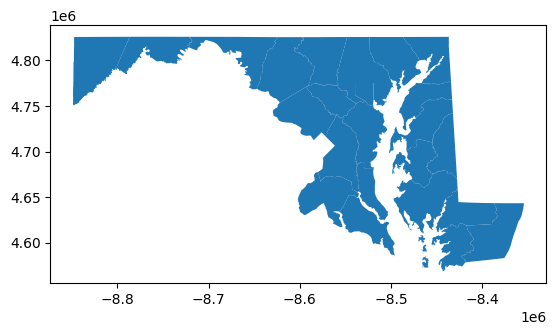

In [5]:
md_map = gpd.read_file('maps/county_template/BNDY_CountyPhyBoundaryGen_DoIT.shp')
md_map.plot()



<Axes: >

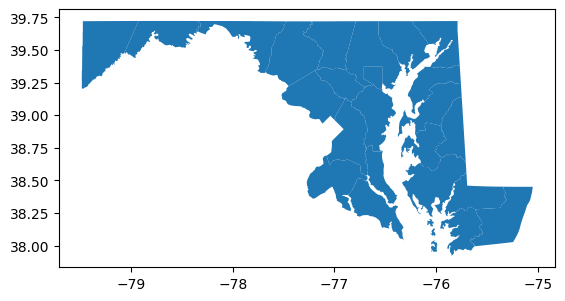

In [6]:
md_map.to_crs(epsg=4326).plot()

In [7]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(crashdata_df['LONGITUDE'], crashdata_df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(crashdata_df, 
                          crs = crs, 
                          geometry = geometry)

c:\Users\John\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [8]:
'''fix, ax = plt.subplots(figsize = (400,160))
md_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
plt.ylim(37.80,39.75)
plt.xlim(-79.5,-75)
plt.savefig('maps/geo_map_xl.png')'''

"fix, ax = plt.subplots(figsize = (400,160))\nmd_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')\ngeo_df.plot(ax=ax)\nplt.ylim(37.80,39.75)\nplt.xlim(-79.5,-75)\nplt.savefig('maps/geo_map_xl.png')"

In [9]:

crashdata_df['COUNTY_NO'] = crashdata_df['COUNTY_NO'].astype(int)
crashdata_df['RTE_NO'] = crashdata_df['RTE_NO'].astype(int)


In [10]:

counties_df = crashdata_df.groupby('COUNTY_NO').count().reset_index()[['COUNTY_NO','Unnamed: 0']]
counties_df.rename(columns= {'Unnamed: 0': 'total_crashes'}, inplace=True)
counties_df.head()

,COUNTY_NO,total_crashes
0,1,2344
1,2,35772
2,3,67579
3,4,3987
4,5,1754


In [11]:
county_population = pd.read_csv('county_populations.csv')
county_population.columns = ['county', '2020_pop']
county_population.head()


,county,2020_pop
0,Allegany,68106.0
1,Anne Arundel,588261.0
2,Baltimore,854535.0
3,Calvert,92783.0
4,Caroline,33293.0


In [30]:
counties = gpd.read_file('maps/county_template/BNDY_CountyPhyBoundaryGen_DoIT.shp')
type(counties)
counties['test'] = '[255,23,44]'
counties.head()


,OBJECTID,county,district,county_fip,countynum,creation_d,last_updat,shape_Leng,shape_Area,geometry,test
0,1,Allegany,6.0,1,1,2007-08-08,2012-01-20,323407.323737,1.849467e+09,"POLYGON ((-8725749.536 4811482.977, -8725742.4...","[255,23,44]"
1,2,Anne Arundel,5.0,3,2,2007-01-09,2008-07-01,281164.885892,1.932406e+09,"POLYGON ((-8520054.213 4699922.348, -8519115.9...","[255,23,44]"
2,3,Baltimore,4.0,5,3,2009-11-17,2012-02-15,367880.178380,2.699024e+09,"POLYGON ((-8510314.044 4750692.127, -8511698.7...","[255,23,44]"
3,4,Baltimore City,0.0,510,24,2006-04-18,2009-11-16,81525.810463,3.973176e+08,"POLYGON ((-8519244.380 4775092.937, -8519252.6...","[255,23,44]"
4,5,Calvert,5.0,9,4,2007-01-09,2008-07-08,184772.503460,9.405832e+08,"POLYGON ((-8519272.914 4680718.245, -8519179.7...","[255,23,44]"


In [13]:
counties.crs


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
counties = counties.to_crs("EPSG: 3395")
#counties.boundary.plot()
counties['test'].squeeze()


0     [255,23,44]
1     [255,23,44]
2     [255,23,44]
3     [255,23,44]
4     [255,23,44]
5     [255,23,44]
6     [255,23,44]
7     [255,23,44]
8     [255,23,44]
9     [255,23,44]
10    [255,23,44]
11    [255,23,44]
12    [255,23,44]
13    [255,23,44]
14    [255,23,44]
15    [255,23,44]
16    [255,23,44]
17    [255,23,44]
18    [255,23,44]
19    [255,23,44]
20    [255,23,44]
21    [255,23,44]
22    [255,23,44]
23    [255,23,44]
Name: test, dtype: object

<Axes: >

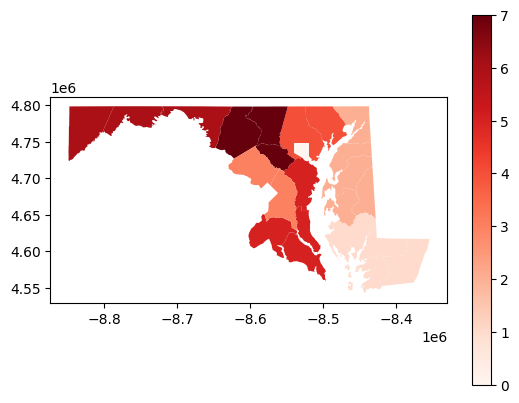

In [47]:
#counties.plot(cmap='magma')
fig, ax = plt.subplots()
#norm = mpl.colors.Normalize(-4,4)
counties.plot(cmap='Reds', ax=ax,legend = True, column='district')

<AxesSubplot:>

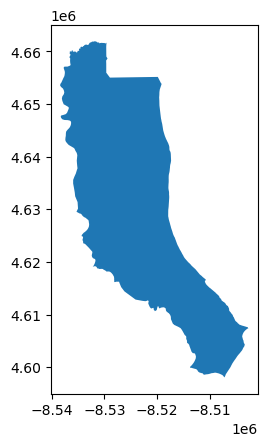

In [ ]:
counties[counties['county'] == 'Calvert'].plot()